# ENGR 1330 – Computational Thinking and Data Science

## HVAC Energy Predictor Final Project - Background

About 25% to 50%  of the total energy consumption by residential buildings are taken by Heating Ventilation and Air Conditioning (HVAC) systems. Architectural design factors involving size, shape and orientation of buildings significantly affect the heating and cooling load. A systematic study on dependence of heating and cooling load on architectural features can lead to energy efficient home design.  


Before you begin, read the description of the dataset here: https://archive.ics.uci.edu/dataset/242/energy+efficiency

## Objective(s):

- Literature scan on HVAC systems and their efficiency
- Analyse an existing  database and build data models to predict the heating load and cooling load
- Build an interface to allow users to enter and return an estimated  cooling and heating load
- Build an interface to allow users to add observations to the underlying database, and automatically update the Data Model to incorporate the new observations

## Tasks: 

**Literature Research:**
- Briefly describe the challenge of minimizing residential HVAC energy consumption 
- Summarize the value of a data model in the context of the conventional approach to HVAC energy prediction

Some places to start are:

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9571769/

https://www.sciencedirect.com/science/article/pii/S1364032114007151
    
https://www.mdpi.com/1424-8220/20/22/6419



**Exploratory Data Analysis**
- Describe (in words) the database.
- Reformat as needed (column headings perhaps) the database for subsequent analysis.

**Model Building**
- Build 2 separate data models to estimate the heating load and the cooling load based on the appropriate architectural features given in your dataset
- Assess the model quality
- Build the input data interface for using the model
- Using your model determine projected heating load and cooling load for 3 possible feature combinations in the table below:

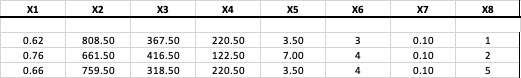


               
       
**Documentation**
- Training video on how to use your tool, and demonstrate the tool(s) as they are run
- Interim report (see deliverables below); this document must be rendered as a .pdf.
- Final ipynb file (see deliverables below)

## Deliverables:

#### Part 1 Interim Report (due Dec 1):
A report that briefly describes the project. Use the Interim Report Template in BlackBoard.  
- Break down each task into manageable subtasks and describe how you intend to solve the subtasks and how you will test each task. (Perhaps make a simple Gantt Chart) or list of meeting times. 
- Address the responsibilities of each team member for tasks completed and tasks to be completed until the end of the semester. (Perhaps make explicit subtask assignments)  

#### Part 2 Final Report (due Dec 10):
- A well-documented JupyterLab (using a python kernel), use markdown cells and commenting for explanations and text. (Including the model, assesment of the model, interface/function to make predictions, interface/function for database and model update) 
- A how-to video demonstrating performance and description of problems that you were not able to solve and also talk about project management such as who did what. Active participation of every single group member is mandatory in the presentation. 
- A final peer evaluation report, where each group member should rate the participation and contribution of the other members.

**Above items can reside in a single video; but structure the video into the two parts; use an obvious transition when moving from "how to ..." into the project management portion.**  Keep the total video length to less than 10 minutes; submit as an *unlisted* YouTube video, and just supply the link (someone on each team is likely to have a YouTube creator account).  Keep in mind a 10 minute video can approach 100MB file size before compression, so it won't upload to Blackboard and cannot be emailed.

In [1]:
#######################################################################################################################################

#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [4]:
df= pd.read_csv('ENB2012data.csv')  ## Assign and read the dataframe
df.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Unnamed: 10
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,NaN
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,NaN
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,NaN
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,NaN
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,NaN
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38,NaN
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16,NaN
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60,NaN
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30,NaN
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97,NaN


In [5]:
## Info about the dataframe
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   X1           765 non-null    float64
 1   X2           765 non-null    float64
 2   X3           765 non-null    float64
 3   X4           765 non-null    float64
 4   X5           765 non-null    float64
 5   X6           765 non-null    int64  
 6   X7           765 non-null    float64
 7   X8           765 non-null    int64  
 8   Y1           765 non-null    float64
 9   Y2           765 non-null    float64
 10  Unnamed: 10  0 non-null      float64
dtypes: float64(9), int64(2)
memory usage: 65.9 KB


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Unnamed: 10
count,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,0.0
mean,0.764497,671.428105,318.307843,176.560131,5.252288,3.499346,0.234902,2.813072,22.319765,24.601412,NaN
std,0.105789,88.061549,43.531519,45.156349,1.751143,1.120519,0.133215,1.550321,10.088787,9.511863,NaN
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.000000,0.000000,6.010000,10.900000,NaN
25%,0.690000,588.000000,294.000000,147.000000,3.500000,2.000000,0.100000,2.000000,13.000000,15.640000,NaN
50%,0.760000,661.500000,318.500000,147.000000,7.000000,3.000000,0.250000,3.000000,19.000000,22.090000,NaN
75%,0.860000,735.000000,343.000000,220.500000,7.000000,5.000000,0.400000,4.000000,31.660000,33.130000,NaN
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.400000,5.000000,43.100000,48.030000,NaN


In [8]:
#Copy the dataframe
cp_df = df
cp_df.drop('Unnamed: 10', inplace=True, axis=1) # Droping the 10th column because it is empty


In [9]:
cp_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


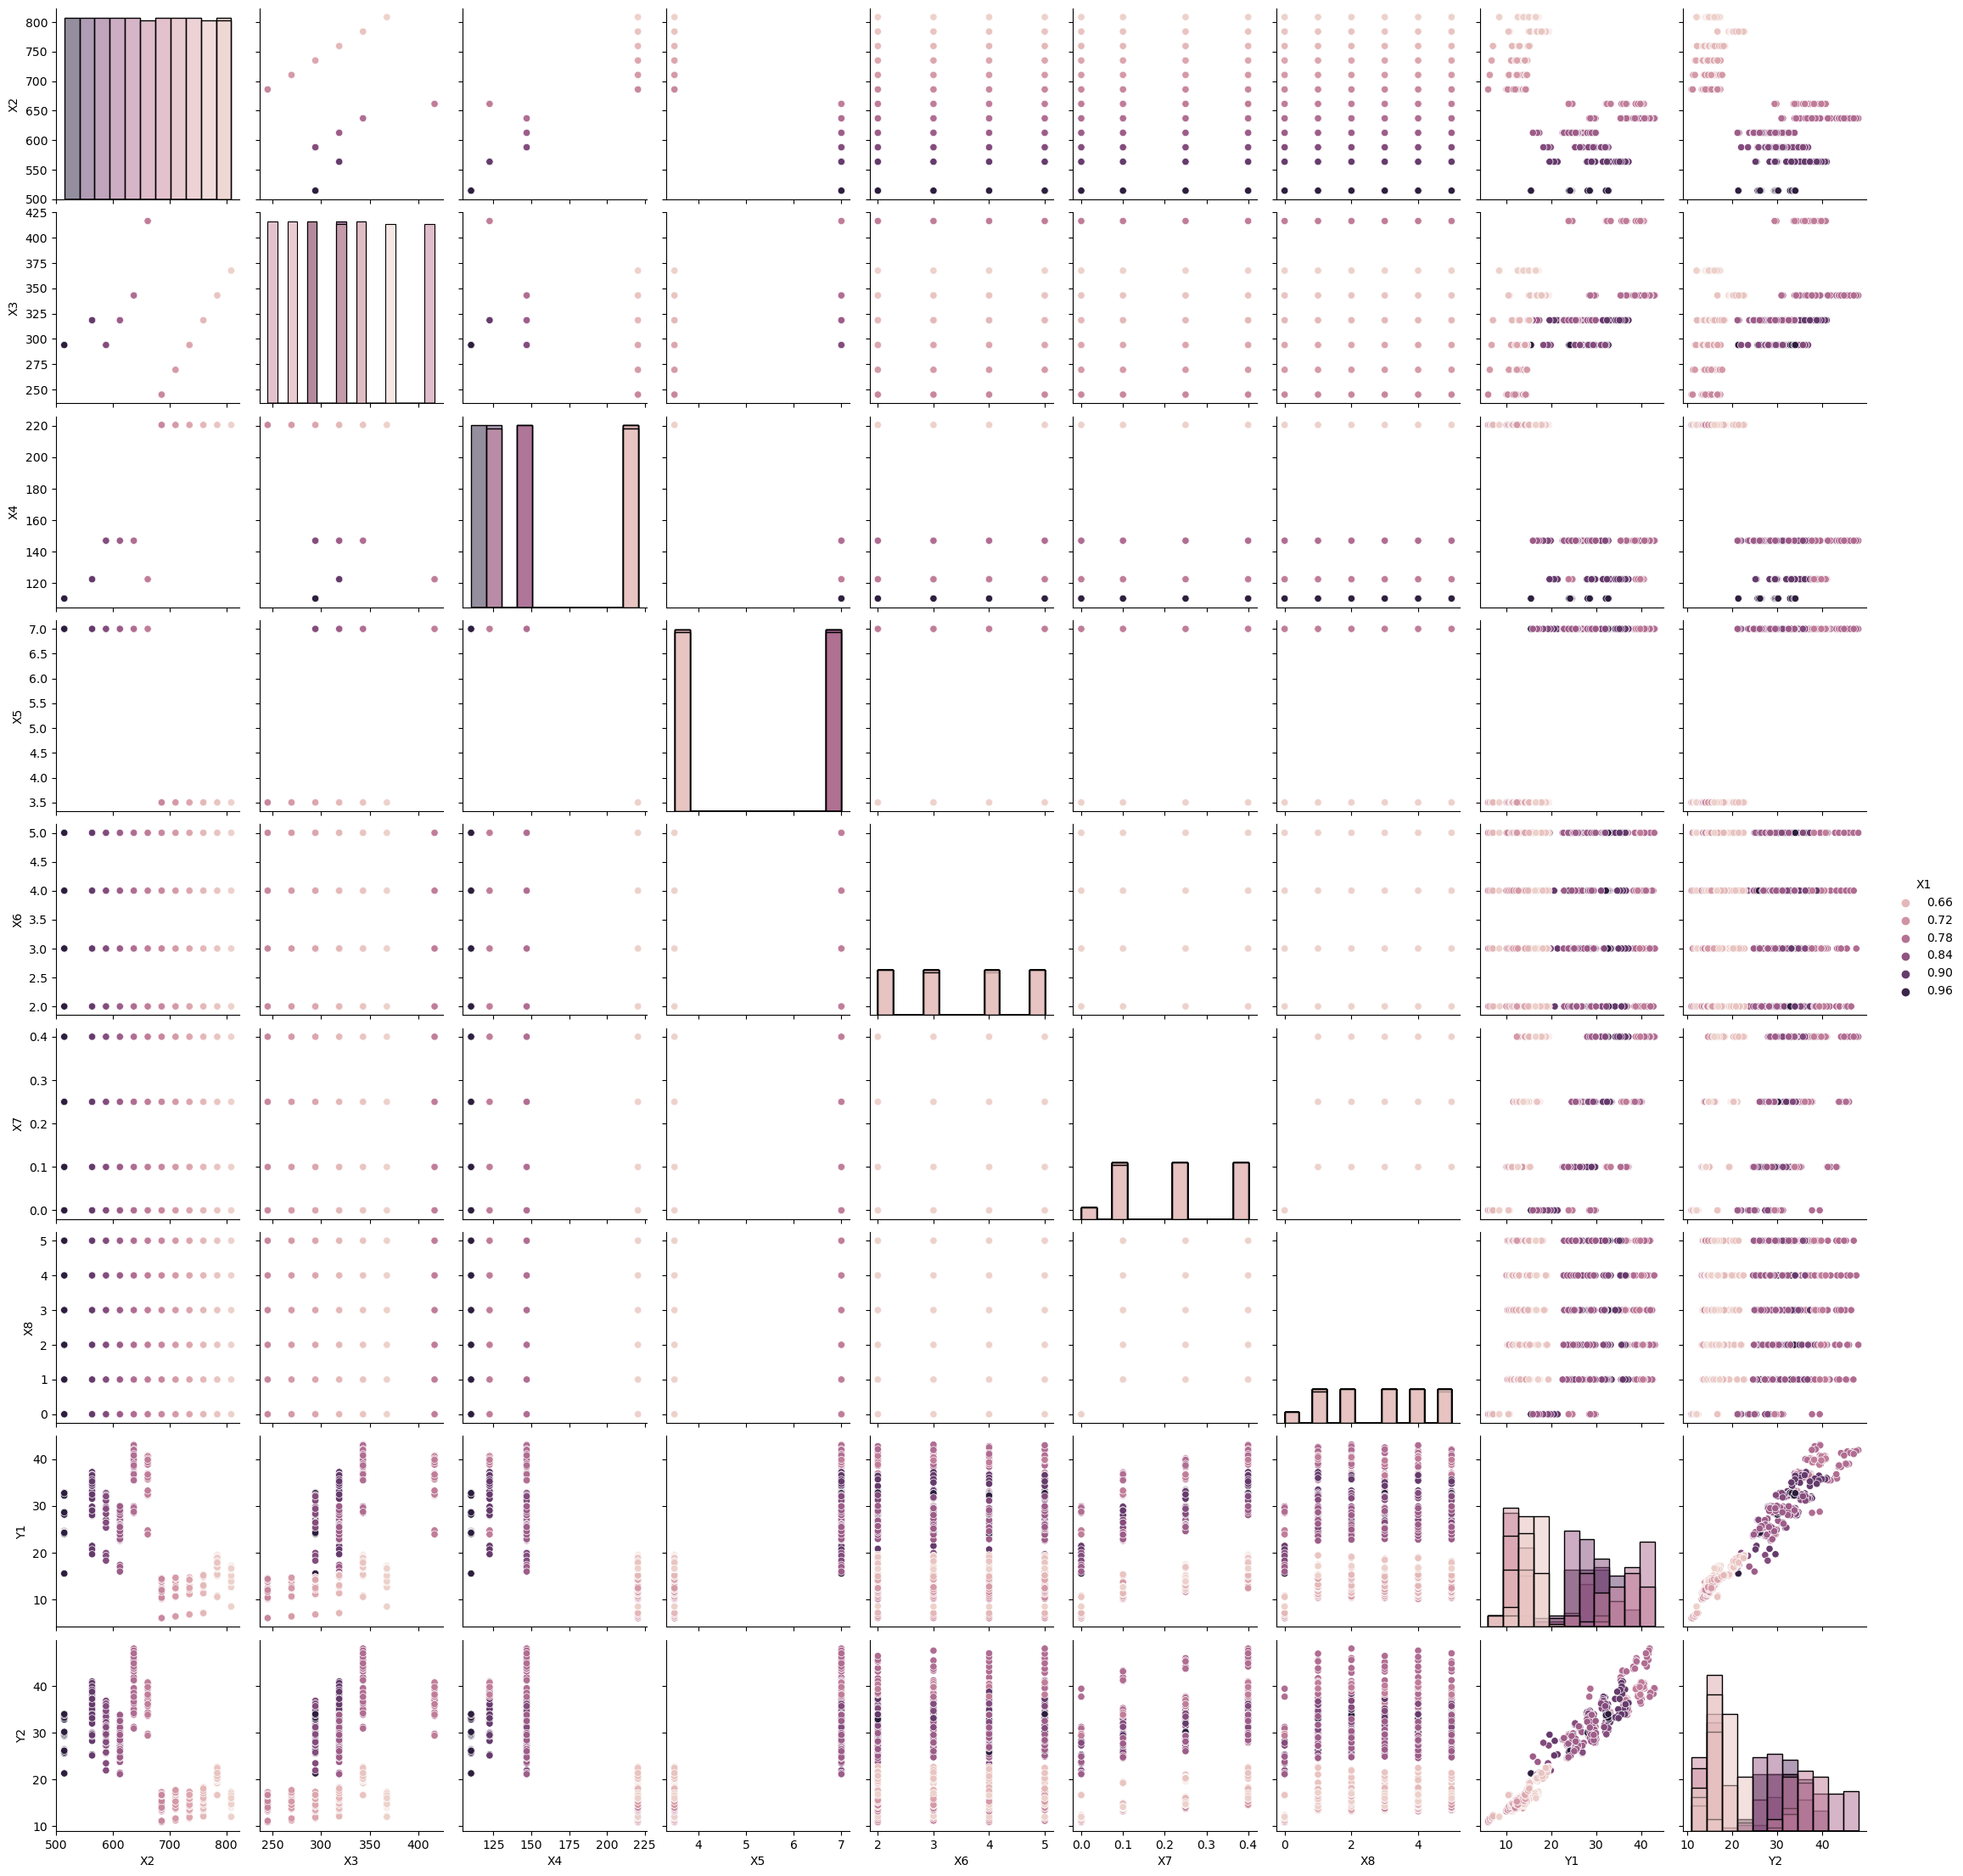

In [10]:
sns.pairplot(cp_df, hue='X1', diag_kind = 'hist')
plt.show()